In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import pybaseball as pb
import pandas as pd


In [2]:
# import pybaseball as pb

# batting_stats_2025 = pb.batting_stats(start_season=2025, end_season=2025)

# batting_stats_2025 = batting_stats_2025[[
#     'IDfg', 'Season', 'Name', 'Team', 'Age',  # Basic Identifiers
#     'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR',  # Volume Metrics
#     'AVG', 'SLG', 'ISO', 'OBP', 'OPS',  # Rate and Power Metrics
#     'BB%', 'K%', 'BB/K', 'wOBA', 'wRC', 'wRC+',  # Advanced Metrics
#     'LD%', 'GB%', 'FB%', 'HR/FB',  # Batted Ball Profile
#     'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',  # Contact Quality
#     'EV', 'LA', 'Barrels', 'Barrel%', 'HardHit%', 'maxEV'  # Statcast (if available)
# ]]

# print(batting_stats_2025.head())
# batting_stats_2025.to_csv('batting_stats_2025.csv', index=False)


In [3]:
# import pandas as pd
# import pybaseball as pb

# # Get all batting stats from 1900 to 2025
# all_years = []
# for year in range(1900, 2026):
#     try:
#         data = pb.batting_stats(start_season=year, end_season=year)
#         data['Season'] = year
#         all_years.append(data)
#     except Exception as e:
#         print(f"Failed to load data for {year}: {e}")

# # Combine into one DataFrame
# batting_stats_all = pd.concat(all_years, ignore_index=True)

# # Filter only the relevant columns
# columns_to_keep = [
#     'IDfg', 'Season', 'Name', 'Team', 'Age',
#     'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR',
#     'AVG', 'SLG', 'ISO', 'OBP', 'OPS',
#     'BB%', 'K%', 'BB/K', 'wOBA', 'wRC', 'wRC+',
#     'LD%', 'GB%', 'FB%', 'HR/FB',
#     'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',
#     'EV', 'LA', 'Barrels', 'Barrel%', 'HardHit%', 'maxEV'
# ]

# # Some older seasons may be missing advanced/statcast stats — drop missing columns if needed
# columns_present = [col for col in columns_to_keep if col in batting_stats_all.columns]
# batting_stats_all = batting_stats_all[columns_present]

# # Save to CSV
# batting_stats_all.to_csv('batting_stats_1900_2025.csv', index=False)

# print("Data from 1900–2025 saved to 'batting_stats_1900_2025.csv'")


In [4]:
#1961-93

batting_stats_all = pd.read_csv('batting_stats_1900_2025.csv')

modernization_era = batting_stats_all[(batting_stats_all['Season'] >= 1961) & (batting_stats_all['Season'] <= 1993)]
filtered_incr_power_era = modernization_era.dropna(axis=1, how='all')
filtered_incr_power_era


,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,SLG,ISO,OBP,OPS,BB%,K%,BB/K,wOBA,wRC,wRC+
6860,1008082,1961,Mickey Mantle,NYY,29,153,514,646,163,87,...,0.687,0.370,0.448,1.135,0.195,0.173,1.13,0.478,156,196
6861,1002043,1961,Norm Cash,DET,26,159,535,672,193,122,...,0.662,0.301,0.487,1.148,0.185,0.126,1.46,0.488,168,194
6862,1000001,1961,Hank Aaron,MIL,27,155,603,671,197,114,...,0.594,0.267,0.381,0.974,0.083,0.095,0.88,0.410,126,153
6863,1008315,1961,Willie Mays,SFG,30,154,572,659,176,101,...,0.584,0.276,0.393,0.977,0.123,0.117,1.05,0.417,127,156
6864,1004612,1961,Jim Gentile,BAL,27,148,486,601,147,74,...,0.646,0.344,0.423,1.069,0.160,0.176,0.91,0.453,133,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,1610,1993,Felix Jose,KCR,28,149,499,539,126,93,...,0.349,0.096,0.303,0.652,0.067,0.176,0.38,0.291,49,72
10836,1013554,1993,Tim Wallach,LAD,35,133,477,522,106,74,...,0.342,0.119,0.271,0.612,0.061,0.134,0.46,0.272,40,66
10837,1003991,1993,Felix Fermin,CLE,29,140,480,514,126,106,...,0.317,0.054,0.303,0.619,0.047,0.027,1.71,0.282,43,68
10838,1099,1993,Ruben Sierra,OAK,27,158,630,692,147,97,...,0.390,0.157,0.288,0.678,0.075,0.140,0.54,0.290,63,79


In [5]:
era_stats = modernization_era.copy()
era_hr = era_stats['HR'].sum()
era_ab = era_stats['AB'].sum()
era_stats['HR_per_AB'] = era_stats['HR'] / era_stats['AB']
era_stats['H_per_AB'] = era_stats['H'] / era_stats['AB']
era_summary = era_stats[['HR_per_AB', 'H_per_AB', 'SLG', 'ISO']].describe()
print(era_summary)
print(f"Home Runs in Dead Ball Era: {era_hr}")
print(f"At Bats in Dead Ball Era: {era_ab}")
print(f"Hits in Dead Ball Era: {era_stats['H'].sum()}")

total_hits = era_stats[['1B', '2B', '3B', 'HR']].sum()
hit_dist = total_hits / total_hits.sum()

print(hit_dist)


         HR_per_AB     H_per_AB          SLG          ISO
count  3980.000000  3980.000000  3980.000000  3980.000000
mean      0.028030     0.274012     0.419105     0.145092
std       0.018941     0.027172     0.070377     0.058798
min       0.000000     0.178571     0.233000     0.019000
25%       0.012557     0.255097     0.369000     0.100000
50%       0.025641     0.272922     0.416000     0.141000
75%       0.040619     0.291829     0.465000     0.184000
max       0.105058     0.389755     0.687000     0.370000
Home Runs in Dead Ball Era: 59594
At Bats in Dead Ball Era: 2126650
Hits in Dead Ball Era: 584537
1B    0.702638
2B    0.167603
3B    0.027808
HR    0.101951
dtype: float64


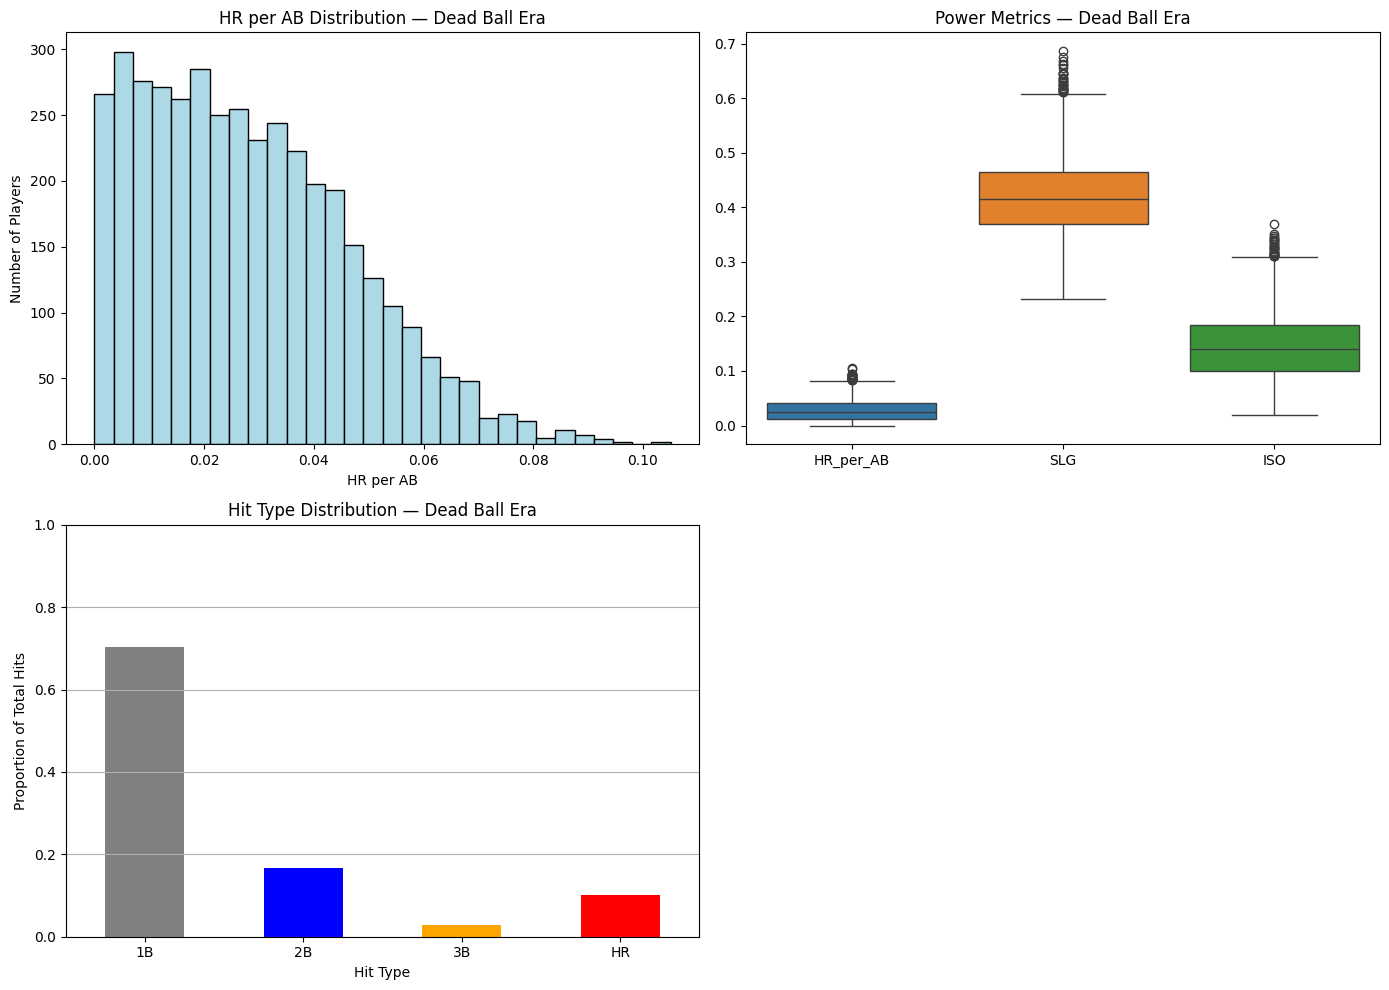

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram of HR per AB
axes[0, 0].hist(era_stats['HR_per_AB'], bins=30, color='lightblue', edgecolor='black')
axes[0, 0].set_title("HR per AB Distribution — Dead Ball Era")
axes[0, 0].set_xlabel("HR per AB")
axes[0, 0].set_ylabel("Number of Players")

# Plot 2: Boxplot of Power Metrics
sns.boxplot(data=era_stats[['HR_per_AB', 'SLG', 'ISO']], ax=axes[0, 1])
axes[0, 1].set_title("Power Metrics — Dead Ball Era")

# Plot 3: Bar chart of Hit Type Distribution
hit_dist.plot(kind='bar', color=['gray', 'blue', 'orange', 'red'], ax=axes[1, 0])
axes[1, 0].set_title('Hit Type Distribution — Dead Ball Era')
axes[1, 0].set_ylabel('Proportion of Total Hits')
axes[1, 0].set_xlabel('Hit Type')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(axis='y')

# Leave the bottom-right plot blank
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [7]:

# Drop rows with missing values (just in case)
era_clean = era_stats.dropna(subset=['ISO', 'SLG', 'HR_per_AB'])

# Define features and target
X = era_clean[['SLG', 'HR_per_AB']]
y = era_clean['ISO']

# Train-test split (just to simulate realistic usage, even if not critical here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
r2 = model.score(X_test, y_test)
print(f"R² Score: {r2:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")
print(f"Feature names: {X.columns.tolist()}")


R² Score: 0.9733
Intercept: -0.0477
Coefficients: [0.33009924 1.94294193]
Feature names: ['SLG', 'HR_per_AB']


C:\Users\sdeck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


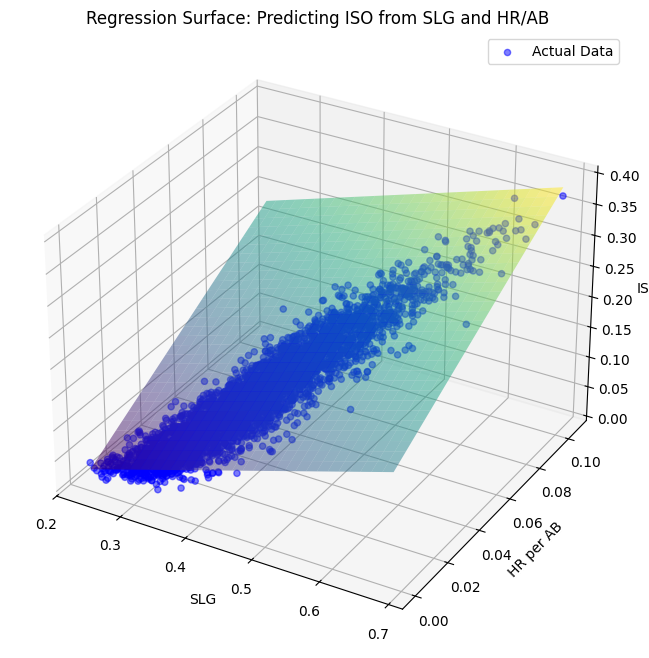

In [8]:
# Clean data
era_clean = era_stats.dropna(subset=['ISO', 'SLG', 'HR_per_AB'])
X = era_clean[['SLG', 'HR_per_AB']]
y = era_clean['ISO']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Create meshgrid for surface
slg_range = np.linspace(X['SLG'].min(), X['SLG'].max(), 30)
hrab_range = np.linspace(X['HR_per_AB'].min(), X['HR_per_AB'].max(), 30)
slg_grid, hrab_grid = np.meshgrid(slg_range, hrab_range)
iso_pred = model.predict(np.c_[slg_grid.ravel(), hrab_grid.ravel()]).reshape(slg_grid.shape)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['SLG'], X['HR_per_AB'], y, color='blue', alpha=0.5, label='Actual Data')
ax.plot_surface(slg_grid, hrab_grid, iso_pred, alpha=0.5, cmap='viridis')

ax.set_xlabel('SLG')
ax.set_ylabel('HR per AB')
ax.set_zlabel('ISO')
ax.set_title('Regression Surface: Predicting ISO from SLG and HR/AB')
plt.legend()
plt.show()


In [9]:
# Identify columns that are completely empty
empty_columns = [col for col in modernization_era.columns if modernization_era[col].isna().all()]

# Print the empty columns
print("Empty columns:", empty_columns)

Empty columns: ['LD%', 'GB%', 'FB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%', 'EV', 'LA', 'Barrels', 'Barrel%', 'HardHit%', 'maxEV']
